In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

As per dataset owner: 

"About Dataset
A/B testing helps in finding a better approach to finding customers, marketing products, getting a higher reach, or anything that helps a business convert most of its target customers into actual customers.

Below are all the features in the dataset:

Campaign Name: The name of the campaign
Date: Date of the record
Spend: Amount spent on the campaign in dollars
of Impressions: Number of impressions the ad crossed through the campaign
Reach: The number of unique impressions received in the ad
of Website Clicks: Number of website clicks received through the ads
of Searches: Number of users who performed searches on the website
of View Content: Number of users who viewed content and products on the website
of Add to Cart: Number of users who added products to the cart
of Purchase: Number of purchases
Two campaigns were performed by the company:

Control Campaign
Test Campaign"

Source: https://www.kaggle.com/datasets/amirmotefaker/ab-testing-dataset 

## Importing data

In [32]:
test_data = pd.read_csv('test_group.csv', sep=';')
test_data.head(10)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275


In [ ]:
control_data = pd.read_csv('control_group.csv', sep=';')
control_data.head(10)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


## Exploratory data analysis (EDA)

In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [35]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


We want to have date column in both datasets as date/datetime object, thus conversion will be neccessarry.

## Converting 'date' columnt to datetime objects.

In [36]:
## Data type adjustments
for df in [test_data, control_data]:
    df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign Name        30 non-null     object        
 1   Date                 30 non-null     datetime64[ns]
 2   Spend [USD]          30 non-null     int64         
 3   # of Impressions     30 non-null     int64         
 4   Reach                30 non-null     int64         
 5   # of Website Clicks  30 non-null     int64         
 6   # of Searches        30 non-null     int64         
 7   # of View Content    30 non-null     int64         
 8   # of Add to Cart     30 non-null     int64         
 9   # of Purchase        30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null C

## Checking for nulls

In [37]:
test_data.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

No nulls in test_data.

In [38]:
control_data.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

### There is some missing data for *'control_data'*. Dropping nulls.

In [39]:
control_data = control_data.dropna()
control_data.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

## Checking number of records for both groups.

In [41]:
print('test_data records', test_data.count())
print('connrol_data records', control_data.count())

test_data records Campaign Name          30
Date                   30
Spend [USD]            30
# of Impressions       30
Reach                  30
# of Website Clicks    30
# of Searches          30
# of View Content      30
# of Add to Cart       30
# of Purchase          30
dtype: int64
connrol_data records Campaign Name          29
Date                   29
Spend [USD]            29
# of Impressions       29
Reach                  29
# of Website Clicks    29
# of Searches          29
# of View Content      29
# of Add to Cart       29
# of Purchase          29
dtype: int64


### At this point sampling would be performed, we are dealing with 2 datasets of 29 (one null record removed) and 30. This data is thus treated as already sampled. However, as A/B testing requires equal number of records for both groups, so if later neccessary it the bigger group will be randomly sampled to ensure that the number of records for both groups is the same.

In [42]:
ab_test_data = pd.concat([test_data, control_data])
ab_test_data.reset_index(drop=True, inplace= True)
ab_test_data.head(5)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2019-08-01,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
1,Test Campaign,2019-08-02,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0
2,Test Campaign,2019-08-03,2365,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,578.0
3,Test Campaign,2019-08-04,2710,78451.0,25937.0,4216.0,2216.0,1437.0,566.0,340.0
4,Test Campaign,2019-08-05,2297,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0


### Checking compiled data

In [43]:
ab_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign Name        59 non-null     object        
 1   Date                 59 non-null     datetime64[ns]
 2   Spend [USD]          59 non-null     int64         
 3   # of Impressions     59 non-null     float64       
 4   Reach                59 non-null     float64       
 5   # of Website Clicks  59 non-null     float64       
 6   # of Searches        59 non-null     float64       
 7   # of View Content    59 non-null     float64       
 8   # of Add to Cart     59 non-null     float64       
 9   # of Purchase        59 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 4.7+ KB


In [44]:
ab_test_data.describe()

,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,59,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2019-08-15 16:16:16.271186432,2435.762712,91775.881356,70868.644068,5682.593220,2321.813559,1900.169492,1087.220339,522.000000
min,2019-08-01 00:00:00,1757.000000,22521.000000,10598.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000
25%,2019-08-08 12:00:00,2113.500000,68853.500000,43230.000000,4227.500000,1962.500000,1249.000000,848.500000,340.000000
50%,2019-08-16 00:00:00,2421.000000,95843.000000,76219.000000,5691.000000,2390.000000,1975.000000,1075.000000,501.000000
75%,2019-08-23 00:00:00,2743.000000,117315.000000,95490.500000,7218.500000,2778.500000,2424.000000,1386.500000,693.000000
max,2019-08-30 00:00:00,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000
std,NaN,376.358795,32465.070636,31023.653515,1754.777559,669.040576,687.263844,430.205246,196.973917


### Looking for outliers.

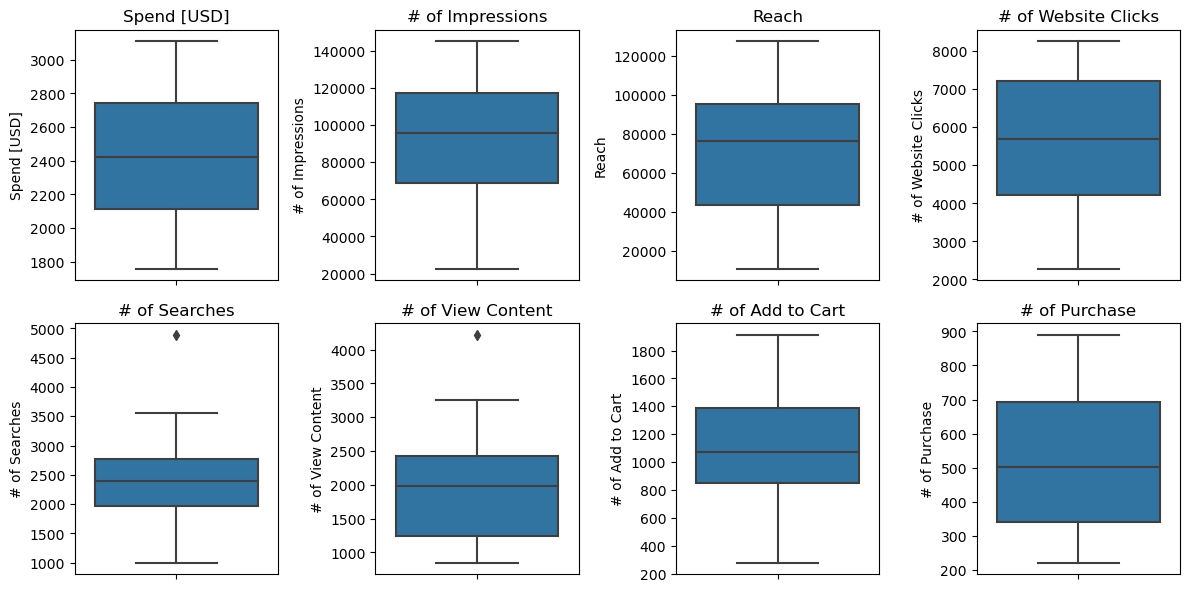

In [45]:
selected_columns = ab_test_data.iloc[:, 2:10]

# Plotting boxplots
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    sns.boxplot(data=selected_columns, y=selected_columns.iloc[:, i], ax=ax)
    ax.set_title(selected_columns.columns[i])
    ax.tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.show()

Columns '# of Searches' and '# of View Content' have outliers, they will be removed later.

### Remmoving outliers

In [46]:
def outlier_check(col):
    percentile25 = ab_test_data[col].quantile(0.25)
    percentile75 = ab_test_data[col].quantile(0.75)
    iqr = percentile75-percentile25

    #Establishing limits:
    up_lim = percentile75 + 1.5 * iqr
    low_lim = percentile25 - 1.5 * iqr
    print('Lower limit:',low_lim)
    print('Upper limit:',up_lim)

    #Establishing_outliers

    outliers = ab_test_data[(ab_test_data[col] > up_lim) | (ab_test_data[col] < low_lim)]
    n_outliers = len(outliers)

    print('There are',n_outliers,' outliers in' , col)
    
    return outliers.index

In [47]:
outlier_check('# of Searches')

Lower limit: 738.5
Upper limit: 4002.5
There are 1  outliers in # of Searches


Index([57], dtype='int64')

In [48]:
ab_test_data.shape

(59, 10)

In [49]:
search_out = outlier_check('# of View Content')
ab_test_data.drop(ab_test_data.index[search_out], inplace=True)

Lower limit: -513.5
Upper limit: 4186.5
There are 1  outliers in # of View Content


In [50]:
ab_test_data.shape

(58, 10)

### Checking if there are any remaining outliers.

In [51]:
outlier_check('# of Searches')

Lower limit: 794.375
Upper limit: 3887.375
There are 0  outliers in # of Searches


Index([], dtype='int64')

Outliers have been removed successfuly.

## A/B test preparation:

In [52]:
# Testing
from scipy.stats import ttest_ind

ab_test_data['Campaign Name'].value_counts()


Campaign Name
Test Campaign       30
Control Campaign    28
Name: count, dtype: int64

Currently we have more records in group b than in group a  than in group a, thus group b has to be sampled to 28.

## As population standard deviation is unknown we will use t-test instead of z-test.

Each of the columns checked before (except `Spend [USD]`) will be considered in our A/B test. As the test will be ran multiple times (for each column) the function will be defined to facilitate the repetitive task.

#### Defining function:

In [53]:
def ab_test_less(col):
    a, b= ab_test_data.groupby('Campaign Name')[col]
    #a is control, b is test
    a,b =a[1], b[1]
    b= b.sample(n=28, random_state=41)
    
    print('H0: Average', ab_test_data[col].name, ' is greater (or equal) for group A than for group B')
    print('H1: Average', ab_test_data[col].name, ' is lower for group A than for group B')
    
    result = ttest_ind(a,b, alternative='less')
    p_value = result[1]
    alpha= 0.05
    
    if alpha > p_value:
        print('H0 has been rejected. With 95% confidence level:')
        print('Average', ab_test_data[col].name, ' is lower for group A than for group B')
    else:
        print('H0 has failed to be rejected. With 95% confidence level.')
    

#### Running AB tests:

In [54]:
ab_test_less('# of Impressions')

H0: Average # of Impressions  is greater (or equal) for group A than for group B
H1: Average # of Impressions  is lower for group A than for group B
H0 has failed to be rejected. With 95% confidence level.


In [55]:
ab_test_less('Reach')

H0: Average Reach  is greater (or equal) for group A than for group B
H1: Average Reach  is lower for group A than for group B
H0 has failed to be rejected. With 95% confidence level.


In [56]:
ab_test_less('# of Website Clicks')

H0: Average # of Website Clicks  is greater (or equal) for group A than for group B
H1: Average # of Website Clicks  is lower for group A than for group B
H0 has been rejected. With 95% confidence level:
Average # of Website Clicks  is lower for group A than for group B


In [57]:
ab_test_less('# of Searches')

H0: Average # of Searches  is greater (or equal) for group A than for group B
H1: Average # of Searches  is lower for group A than for group B
H0 has been rejected. With 95% confidence level:
Average # of Searches  is lower for group A than for group B


In [58]:
ab_test_less('# of View Content')

H0: Average # of View Content  is greater (or equal) for group A than for group B
H1: Average # of View Content  is lower for group A than for group B
H0 has failed to be rejected. With 95% confidence level.


In [59]:
ab_test_less('# of Add to Cart')

H0: Average # of Add to Cart  is greater (or equal) for group A than for group B
H1: Average # of Add to Cart  is lower for group A than for group B
H0 has failed to be rejected. With 95% confidence level.


In [60]:
ab_test_less('# of Purchase')

H0: Average # of Purchase  is greater (or equal) for group A than for group B
H1: Average # of Purchase  is lower for group A than for group B
H0 has failed to be rejected. With 95% confidence level.


H0 has failed to be rejected in  3/5 metrics. The only metrics for which there were statisitic indicators to reject H0 were: `Average # of Searches` and `Average # of Website clicks`. Taken into account that H0 has failed to be rejected for `# of Purchase` (which would be consider ultimate factor of positive change implementation), there was no statistical confirmation that gorup B (test/new solution group) performed better than the initial one (pre-change group).

#### In this case recommendation would be to keep the solution A untill solution B has improved its perforance so it brings better results than solution A.